# Python for Data Analysis : Incident log Manager
## 1 - Importation de la data


In [31]:
import pandas as pd
import numpy as np
db = pd.read_csv("/Users/olivierdupain/Downloads/incident_event_log.csv")

## 2 - Exploration 

In [32]:
len(db)

141712

In [33]:
db['number'].value_counts()

INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
              ..
INC0030818     2
INC0012043     2
INC0016000     2
INC0005513     2
INC0018264     2
Name: number, Length: 24918, dtype: int64

In [34]:
len(db['number'].unique())

24918

In [35]:
db['incident_state'].value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

## 3 - Traitement NA

In [36]:
colonnes = list(db)

In [37]:
db = db.replace('?', np.nan)

In [38]:
db.isna().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

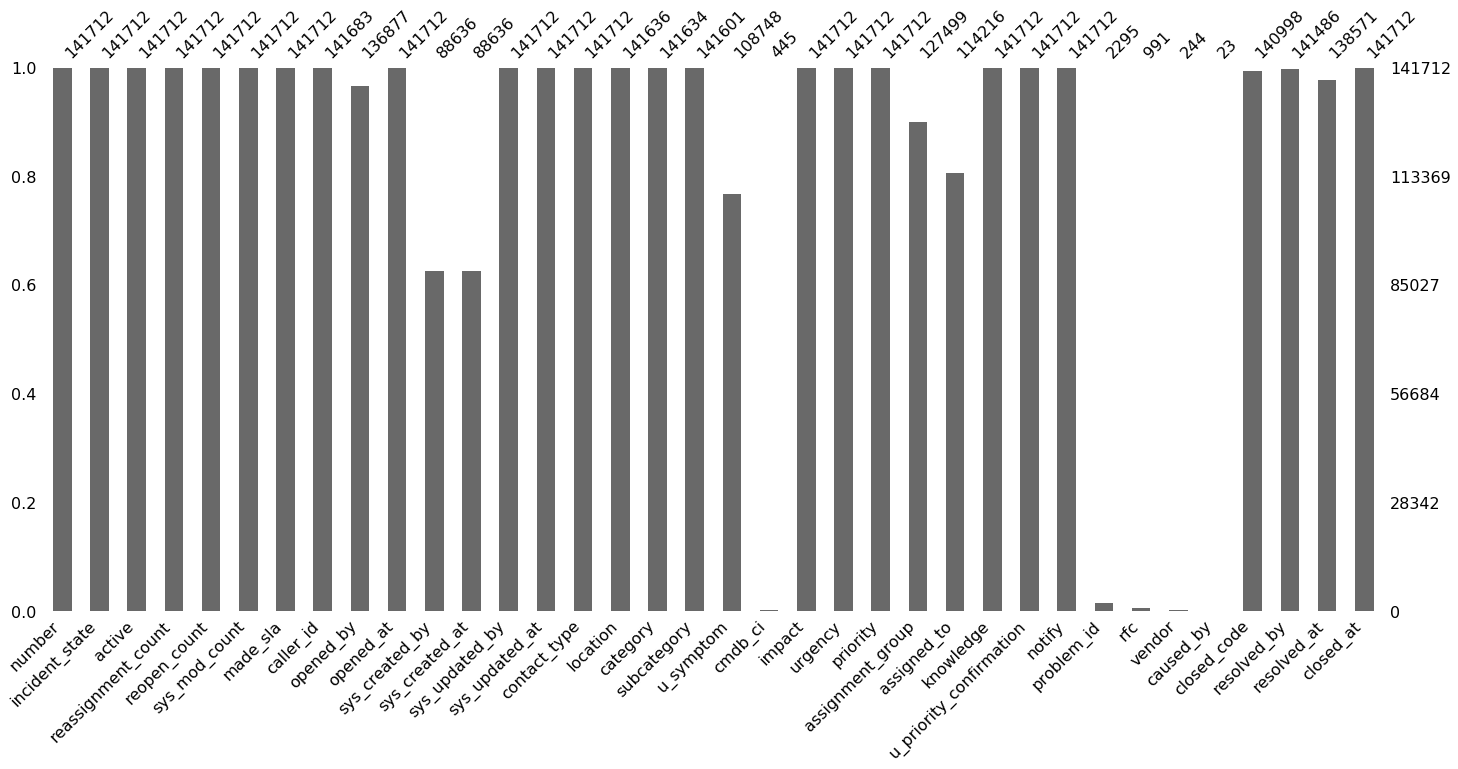

In [39]:
import missingno as msno 
msno.bar(db)

In [6]:
#on supprime les colonnes : problem_id rfc vendor caused_by cmb_ci
db.drop(['problem_id','rfc','vendor','caused_by','cmdb_ci'], axis=1,inplace=True)

In [7]:
colonnes = list(db)

In [14]:
db['contact_type'].value_counts()

Phone             140462
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: contact_type, dtype: int64

## 4 - Passage des colonnes qualitative/date en quantitative

In [8]:
for colonne in colonnes:
    print(type(db[colonne][1]))

<class 'str'>
<class 'str'>
<class 'numpy.bool_'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.bool_'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [9]:
#identifiant en int 
db['number'] = [int(number[3:]) for number in db['number']]

In [10]:
# colonne active en int
db['active'] = db['active'].astype(int)

In [11]:
db['made_sla'] = db['made_sla'].astype(int)

In [12]:
# colonne caller_id : on supprime les lignes ayant des NA (29 lignes) et on transforme en int 
db['keep'] = db['caller_id'].isna()
db = db[db['keep']==False]
db['caller_id'] = [str(identifiant)[7:] for identifiant in db['caller_id']]
db['caller_id'] = db['caller_id'].astype(int)
db.drop("keep", axis=1, inplace=True)

In [13]:
# colonne opened_by : on supprime les lignes ayant des NA (4800 lignes) et on transforme en int 
db['keep'] = db['opened_by'].isna()
db = db[db['keep']==False]
db['opened_by'] = [str(identifiant)[10:] for identifiant in db['opened_by']]
db['opened_by'] = db['opened_by'].astype(int)
db.drop("keep", axis=1, inplace=True)

In [14]:
# colonne location : on supprime les lignes ayant des NA (28 lignes) et on transforme en int 
db['keep'] = db['location'].isna()
db = db[db['keep']==False]
db['location'] = [str(location)[9:] for location in db['location']]
db['location'] = db['location'].astype(int)
db.drop("keep", axis=1, inplace=True)

In [15]:
# colonne location : on supprime les lignes ayant des NA (30 lignes) et on transforme en int 
db['keep'] = db['category'].isna()
db = db[db['keep']==False]
db['category'] = [str(location)[9:] for location in db['category']]
db['category'] = db['category'].astype(int)
db.drop("keep", axis=1, inplace=True)

In [16]:
# colonne location : on supprime les lignes ayant des NA (28 lignes) et on transforme en int 
db['keep'] = db['subcategory'].isna()
db = db[db['keep']==False]
db['subcategory'] = [str(location)[12:] for location in db['subcategory']]
db['subcategory'] = db['subcategory'].astype(int)
db.drop("keep", axis=1, inplace=True)

In [17]:
#impact#urgency#priority
def keepGrade(column_name):
    db[column_name]=[str(value)[:1] for value in db[column_name]]
    db[column_name]=db[column_name].astype(int)
keepGrade('impact')
keepGrade('urgency')
keepGrade('priority')

In [18]:
#resolved_by
db['resolved_by'] = [str(location)[12:] for location in db['resolved_by']]
db['resolved_by']= db['resolved_by'].replace('','0')
db['resolved_by'].astype(int)

0         149
1         149
2         149
3         149
4          81
         ... 
141707      9
141708      9
141709      9
141710      9
141711      9
Name: resolved_by, Length: 136763, dtype: int64

In [19]:
# colonne closed_code : on supprime les lignes ayant des NA (688 lignes) et on transforme en int 
db['keep'] = db['closed_code'].isna()
db = db[db['keep']==False]
db['closed_code'] = [str(location)[5:] for location in db['closed_code']]
db['closed_code'] = db['closed_code'].astype(int)
db.drop("keep", axis=1, inplace=True)

In [20]:
# colonne u_symptom:
db['keep'] = db['closed_code'].isna()
db = db[db['keep']==False]
db['u_symptom'] = [str(location)[8:] for location in db['u_symptom']]
db['u_symptom']= db['u_symptom'].replace('','0')
db['u_symptom'].astype(int)
db.drop("keep", axis=1, inplace=True)

In [21]:
db['u_symptom']

0          72
1          72
2          72
3          72
4         471
         ... 
141707    494
141708    494
141709    494
141710    494
141711    494
Name: u_symptom, Length: 136075, dtype: object

## 5 - Création de la variable TimeDelta : temps par incident

In [22]:
# convertit les dates string -> datetime
from datetime import datetime
db['opened_at'] = [datetime.strptime(value, '%d/%m/%Y %H:%M') for value in db['opened_at']]
db['closed_at'] = [datetime.strptime(value, '%d/%m/%Y %H:%M') for value in db['closed_at']]

In [23]:
# creation de time delta (on refait l'index avant sinon ca marche pas)
db.set_index(["number"], inplace = True, append = True, drop = True) 
# resetting index 
db.reset_index(inplace = True)
db.drop(['level_0'], axis=1, inplace = True)
db['timedelta'] = [db['closed_at'][index] - value for index,value in enumerate(db['opened_at'])]
db['timedelta'] = [int(value.total_seconds()/(86400)) for value in db['timedelta']]
db["timedelta"].mean()

16.53381591034356

## 6 - Préparation des jour d'ouverture de l'incident pour les dummies réalisés après

In [24]:
## On ajoute une colonne avec le jour de la semaine
db['jourOuverture'] = [value.weekday() for value in db['opened_at']]
# dummies pour les jours d'ouverture 
liste_ouverture = pd.Series(db['jourOuverture'])
df_ouverture = pd.get_dummies(liste_ouverture)
db = pd.concat([db, df_ouverture],axis=1)
db.drop(['jourOuverture'], axis=1)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,resolved_at,closed_at,timedelta,0,1,2,3,4,5,6
0,45,New,1,0,0,0,1,2403,8,2016-02-29 01:16:00,...,29/2/2016 11:29,2016-03-05 12:00:00,5,1,0,0,0,0,0,0
1,45,Resolved,1,0,0,2,1,2403,8,2016-02-29 01:16:00,...,29/2/2016 11:29,2016-03-05 12:00:00,5,1,0,0,0,0,0,0
2,45,Resolved,1,0,0,3,1,2403,8,2016-02-29 01:16:00,...,29/2/2016 11:29,2016-03-05 12:00:00,5,1,0,0,0,0,0,0
3,45,Closed,0,0,0,4,1,2403,8,2016-02-29 01:16:00,...,29/2/2016 11:29,2016-03-05 12:00:00,5,1,0,0,0,0,0,0
4,47,New,1,0,0,0,1,2403,397,2016-02-29 04:40:00,...,1/3/2016 09:52,2016-03-06 10:00:00,6,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136070,120835,Closed,0,1,0,4,1,116,12,2017-02-16 09:09:00,...,16/2/2017 09:53,2017-02-16 09:53:00,0,0,0,0,1,0,0,0
136071,121064,Active,1,0,0,0,1,116,12,2017-02-16 14:17:00,...,16/2/2017 16:38,2017-02-16 16:38:00,0,0,0,0,1,0,0,0
136072,121064,Active,1,1,0,1,1,116,12,2017-02-16 14:17:00,...,16/2/2017 16:38,2017-02-16 16:38:00,0,0,0,0,1,0,0,0
136073,121064,Resolved,1,1,0,2,1,116,12,2017-02-16 14:17:00,...,16/2/2017 16:38,2017-02-16 16:38:00,0,0,0,0,1,0,0,0


## 7 - Suppression des valeurs absurdes

In [25]:
compt = 0
for ind,val in enumerate(db['timedelta']):
    if(val>50):
        compt=compt+1
compt

6605

In [33]:
808/24093 #c'est le nombre de cas distinct avec des valeurs > 50 jours --> on peut parler d'anormalité--> on supprime

0.03353671190802308

In [26]:
db2 = db[db['timedelta']<50]

In [27]:
db2.set_index(["number"], inplace = True, append = True, drop = True) 
# resetting index 
db2.reset_index(inplace = True)
db2.drop(['level_0'], axis=1, inplace = True)

/Users/olivierdupain/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 8 - Création de la dataframe utilisée pour les modèles

In [28]:
df5 = pd.DataFrame(columns=['number','reopen_count','caller_id','opened_by','location','category','subcategory','u_symptom','impact','urgency','priority','closed_code','resolved_by','jourOuverture','timedelta'])

In [29]:
compteur=0
for index,val in enumerate(db2['number']) :
    if val not in df5['number'].tolist():
        df5 = df5.append({'number':db2['number'][index],'reopen_count':db2['reopen_count'][index],'caller_id':db2['caller_id'][index],'opened_by':db2['opened_by'][index],'location':db2['location'][index],'category':db2['category'][index],'subcategory':db2['subcategory'][index],'u_symptom':db2['u_symptom'][index],'impact':db2['impact'][index],'urgency':db2['urgency'][index],'priority':db2['priority'][index],'closed_code':db2['closed_code'][index],'resolved_by':db2['resolved_by'][index],'jourOuverture':db2['jourOuverture'][index] ,'timedelta':db2['timedelta'][index]},ignore_index=True)
        compteur=compteur+1
        print(compteur)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [41]:
df7=df5.copy()

In [43]:
df6=df5.copy()

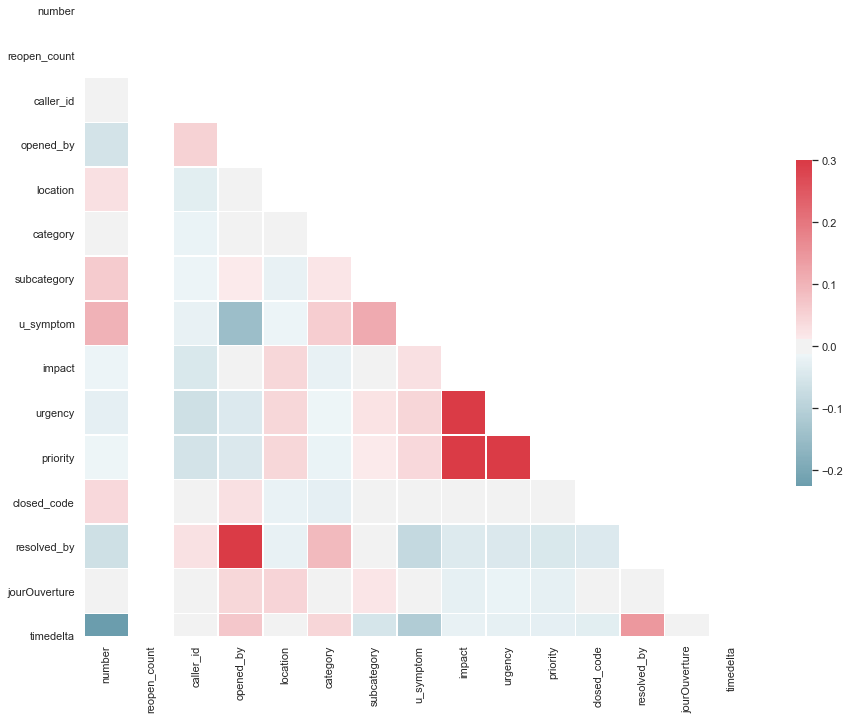

In [46]:
from sklearn import preprocessing
import seaborn as sns

features = list(df6.columns)

x = df6.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)
df_norm.columns = features

corr = df_norm.corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

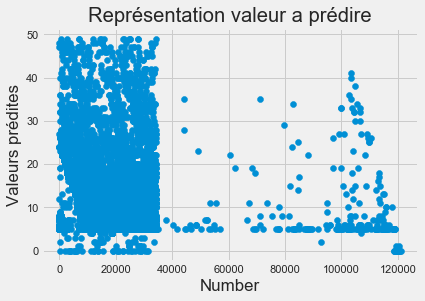

In [62]:
plt.ylabel('Valeurs prédites'); plt.xlabel('Number'); plt.title('Représentation valeur a prédire')
plt.scatter(x=df7['number'], y=df7['timedelta'])

In [158]:
compt = 0
for ind,val in enumerate(df6['timedelta']):
    if(val>50):
        compt=compt+1
compt

0

In [48]:
from sklearn.model_selection import train_test_split

y = df6['timedelta']
X = df6
X.drop(['timedelta'], axis=1,inplace=True)

In [49]:
X

,number,reopen_count,caller_id,opened_by,location,category,subcategory,u_symptom,impact,urgency,priority,closed_code,resolved_by,jourOuverture
0,45,0,2403,8,143,55,170,72,2,2,3,5,149,0
1,47,0,2403,397,165,40,215,471,2,2,3,5,81,0
2,57,0,4416,8,204,20,125,471,2,2,3,10,5,0
3,60,0,4491,180,204,9,97,450,2,2,3,3,113,0
4,62,0,3765,180,93,53,168,232,2,2,3,7,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23280,120303,0,1866,508,246,50,10,533,3,2,4,6,0,2
23281,120304,0,90,8,188,52,177,494,2,2,3,6,5,2
23282,120319,0,1899,508,246,50,10,533,3,2,4,6,0,2
23283,120835,0,116,12,204,42,223,494,2,2,3,9,9,3


## 9 - Dummies pour le jour d'ouverture de gestion de l'incident

In [50]:
liste_ouverture = pd.Series(X['jourOuverture'])
df_ouverture = pd.get_dummies(liste_ouverture)
X = pd.concat([X, df_ouverture],axis=1)
X.drop(['jourOuverture'], axis=1, inplace=True)

## 10 - MODELES : 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17463, 20) (5822, 20) (17463,) (5822,)


### A/ Regression linéaire

Mean Absolute Error: 4.84 jours.
Accuracy: 38.66 %.
Analyse des importances impossible


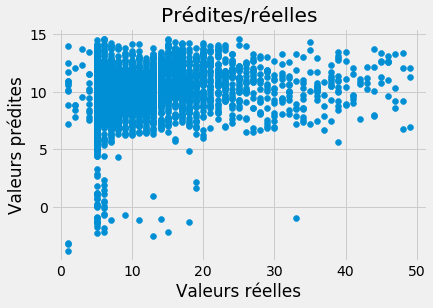

In [76]:
from sklearn.linear_model import LinearRegression
lineaire = LinearRegression()
lineaire.fit(X_train, y_train)
evaluate_regression(lineaire,X_test,y_test)

### b/ Tree regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
tree = DecisionTreeRegressor()

In [81]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Mean Absolute Error: 4.29 jours.
Accuracy: 52.21 %.
Variable: number               Importance: 0.32
Variable: resolved_by          Importance: 0.13
Variable: caller_id            Importance: 0.11
Variable: opened_by            Importance: 0.08
Variable: location             Importance: 0.07
Variable: category             Importance: 0.06
Variable: subcategory          Importance: 0.06
Variable: u_symptom            Importance: 0.05
Variable: closed_code          Importance: 0.04
Variable: priority             Importance: 0.01
Variable:                    0 Importance: 0.01
Variable:                    1 Importance: 0.01
Variable:                    2 Importance: 0.01
Variable:                    3 Importance: 0.01
Variable:                    4 Importance: 0.01
Variable: reopen_count         Importance: 0.0
Variable: impact               Importance: 0.0
Variable: urgency              Importance: 0.0
Variable:                    5 Importance: 0.0
Variable:                    6 Importanc

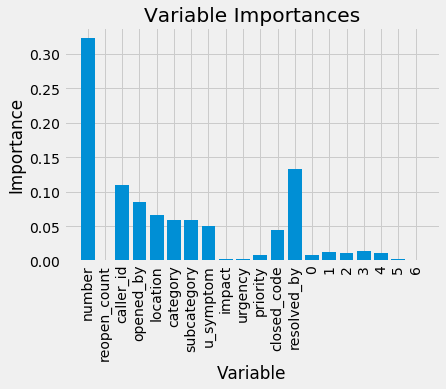

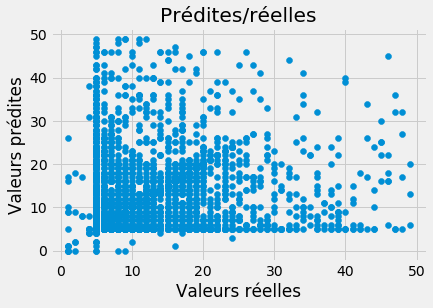

In [82]:
evaluate_regression(tree, X_test,y_test)

### C/ Réseau neurone pour MLPRegressor

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence

In [115]:
mlp = make_pipeline(StandardScaler(),MLPRegressor(hidden_layer_sizes=(40,30), max_iter=600, random_state=0))
mlp.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(40, 30),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_iter=600,
                              momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=0, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

Mean Absolute Error: 4.34 jours.
Accuracy: 44.54 %.
Analyse des importances impossible


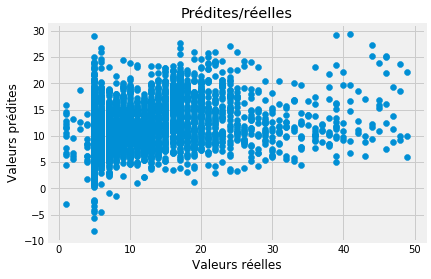

In [222]:
evaluate_regression(mlp,X_test,y_test)

###  D/ Random Forest

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17463, 20) (5822, 20) (17463,) (5822,)


In [53]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42,criterion='mse')

In [54]:
rf.fit(X_train, y_train);

Mean Absolute Error: 3.41 jours.
Accuracy: 59.12 %.
Variable: number               Importance: 0.31
Variable: resolved_by          Importance: 0.13
Variable: caller_id            Importance: 0.11
Variable: opened_by            Importance: 0.08
Variable: location             Importance: 0.07
Variable: subcategory          Importance: 0.07
Variable: category             Importance: 0.06
Variable: u_symptom            Importance: 0.05
Variable: closed_code          Importance: 0.05
Variable: priority             Importance: 0.01
Variable:                    0 Importance: 0.01
Variable:                    1 Importance: 0.01
Variable:                    2 Importance: 0.01
Variable:                    3 Importance: 0.01
Variable:                    4 Importance: 0.01
Variable: reopen_count         Importance: 0.0
Variable: impact               Importance: 0.0
Variable: urgency              Importance: 0.0
Variable:                    5 Importance: 0.0
Variable:                    6 Importanc

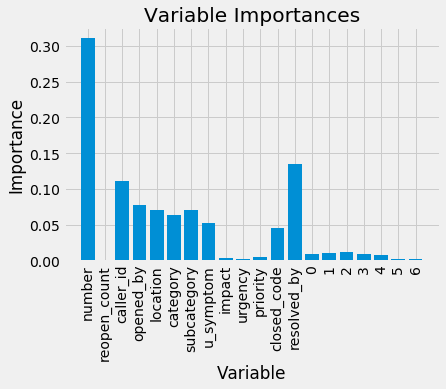

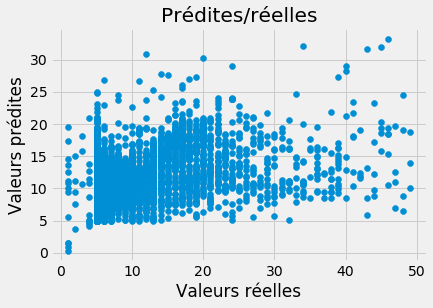

In [57]:
evaluate_regression(rf, X_test,y_test)

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

def evaluate_regression(algo, X_test, y_test):
    # Use the forest's predict method on the test data
    predictions = algo.predict(X_test)
    # Calculate the absolute errors
    errors = abs(predictions - y_test)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'jours.')
    y_test = [1 if value == 0 else value for value in y_test ]
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    try:
        feature_list = list(X_train.columns)
        # Get numerical feature importances
        importances = list(algo.feature_importances_)
        # List of tuples with variable and importance
        feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
        # Sort the feature importances by most important first
        feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
        # Print out the feature and importances 
        [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
        # Import matplotlib for plotting and use magic command for Jupyter Notebooks
        
        # Set the style
        plt.style.use('fivethirtyeight')
        # list of x locations for plotting
        x_values = list(range(len(importances)))
        # Make a bar chart
        plt.bar(x_values, importances, orientation = 'vertical')
        # Tick labels for x axis
        plt.xticks(x_values, feature_list, rotation='vertical')
        # Axis labels and title
        plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
        plt.show()
    except:
        print('Analyse des importances impossible')
    plt.ylabel('Valeurs prédites'); plt.xlabel('Valeurs réelles'); plt.title('Prédites/réelles')
    plt.scatter(x=y_test, y=algo.predict(X_test))

### E/ Extra Tree Regressor

In [244]:
from sklearn.ensemble import ExtraTreesRegressor
extraTree = ExtraTreesRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=42, criterion='mae')

In [245]:
extraTree.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start=False)

Mean Absolute Error: 3.62 jours.
Accuracy: 56.5 %.
Variable: number               Importance: 0.29
Variable: resolved_by          Importance: 0.12
Variable: opened_by            Importance: 0.09
Variable: caller_id            Importance: 0.08
Variable: location             Importance: 0.07
Variable: category             Importance: 0.07
Variable: subcategory          Importance: 0.07
Variable: u_symptom            Importance: 0.06
Variable: closed_code          Importance: 0.06
Variable:                    0 Importance: 0.02
Variable:                    2 Importance: 0.02
Variable:                    4 Importance: 0.02
Variable: impact               Importance: 0.01
Variable: priority             Importance: 0.01
Variable:                    1 Importance: 0.01
Variable:                    3 Importance: 0.01
Variable: reopen_count         Importance: 0.0
Variable: urgency              Importance: 0.0
Variable:                    5 Importance: 0.0
Variable:                    6 Importanc

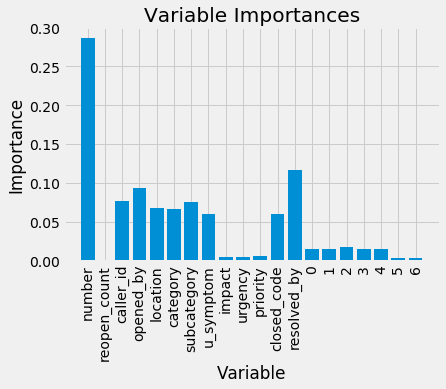

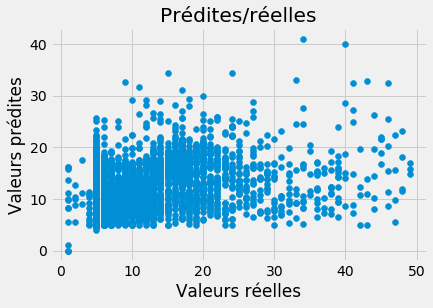

In [246]:
evaluate_regression(extraTree, X_test,y_test)

### F - Gradient Boosting regressor

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

In [55]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Mean Absolute Error: 3.71 jours.
Accuracy: 55.0 %.
Variable: number               Importance: 0.54
Variable: resolved_by          Importance: 0.17
Variable: opened_by            Importance: 0.09
Variable: category             Importance: 0.07
Variable: closed_code          Importance: 0.04
Variable: subcategory          Importance: 0.03
Variable: u_symptom            Importance: 0.03
Variable: location             Importance: 0.02
Variable: reopen_count         Importance: 0.0
Variable: caller_id            Importance: 0.0
Variable: impact               Importance: 0.0
Variable: urgency              Importance: 0.0
Variable: priority             Importance: 0.0
Variable:                    0 Importance: 0.0
Variable:                    1 Importance: 0.0
Variable:                    2 Importance: 0.0
Variable:                    3 Importance: 0.0
Variable:                    4 Importance: 0.0
Variable:                    5 Importance: 0.0
Variable:                    6 Importance: 0.0


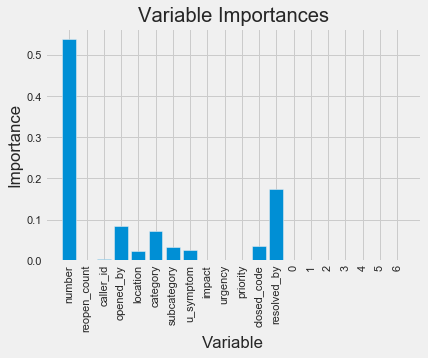

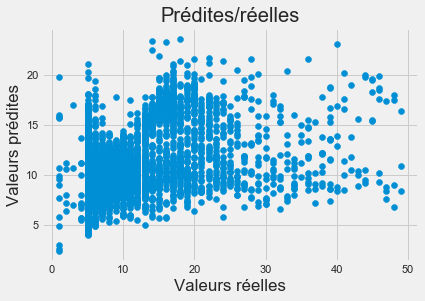

In [57]:
evaluate_regression(gbr,X_test,y_test)

## 11 - Hypertuning parameters

### Random Forest Tuning parameter

In [61]:
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [62]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [117]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 70, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 74.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [118]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

Mean Absolute Error: 3.38 jours.
Accuracy: 59.64 %.
Variable: number               Importance: 0.28
Variable: resolved_by          Importance: 0.14
Variable: caller_id            Importance: 0.1
Variable: opened_by            Importance: 0.09
Variable: subcategory          Importance: 0.08
Variable: location             Importance: 0.07
Variable: category             Importance: 0.07
Variable: u_symptom            Importance: 0.07
Variable: closed_code          Importance: 0.05
Variable: priority             Importance: 0.01
Variable:                    0 Importance: 0.01
Variable:                    1 Importance: 0.01
Variable:                    2 Importance: 0.01
Variable:                    3 Importance: 0.01
Variable:                    4 Importance: 0.01
Variable: reopen_count         Importance: 0.0
Variable: impact               Importance: 0.0
Variable: urgency              Importance: 0.0
Variable:                    5 Importance: 0.0
Variable:                    6 Importance

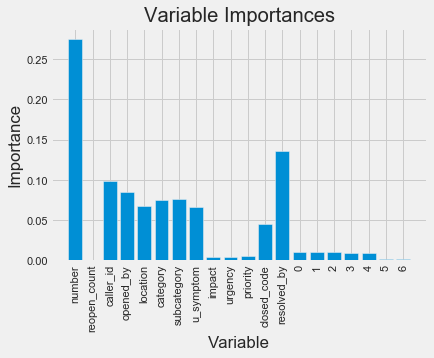

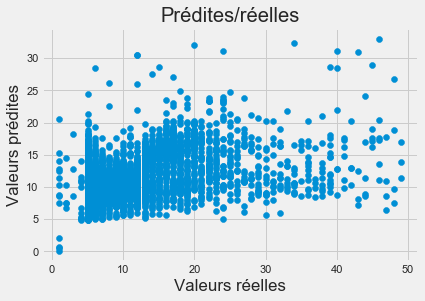

In [120]:
evaluate_regression(rf_random.best_estimator_, X_test,y_test)

## 12 - Enregistrement du modèle

In [125]:
from sklearn.externals import joblib

In [123]:
joblib.dump(rf_random.best_estimator_, "best_model.sav")

['best_model.sav']

In [137]:
!ls

20190402_082421231_CTMS01R_004331_sss.xml
ArticleNLP.pdf
Australie
BP FINAL .key
Brainee
Bureau 30 mai 2018
CREATE KEYSPACE IF NOT EXISTS school
CV.pdf
Capture d’écran 2019-02-04 à 15.10.27.png
Capture d’écran 2019-02-15 à 14.52.19.png
Capture d’écran 2019-02-15 à 15.33.32.png
Capture d’écran 2019-02-15 à 15.52.03.png
Capture d’écran 2019-02-19 à 17.23.30.png
Capture d’écran 2019-02-20 à 10.08.17.png
Capture d’écran 2019-02-20 à 13.22.30.png
Capture d’écran 2019-02-28 à 14.51.57.png
Capture d’écran 2019-02-28 à 14.52.07.png
Capture d’écran 2019-03-08 à 15.45.11.png
Capture d’écran 2019-03-22 à 15.48.35.png
Capture d’écran 2019-03-26 à 13.55.06.png
Capture d’écran 2019-03-26 à 13.56.31.png
Capture d’écran 2019-03-26 à 17.43.16.png
Capture d’écran 2019-11-06 à 10.24.14.png
Capture d’écran 2019-12-10 à 06.31.17.png
Capture d’écran 2019-12-17 à 14.24.59.png
Capture d’écran 2019-12-18 à 15.08.23.png
Capture d’écran 2019-12-21 à 16.14.51.png
Capture d’écran 2020-01-17 à 19.12.35.png
Capture 

### Test load

In [163]:
rf_best_load = joblib.load("best_model.sav")

In [169]:
prediction = rf_best_load.predict(X)

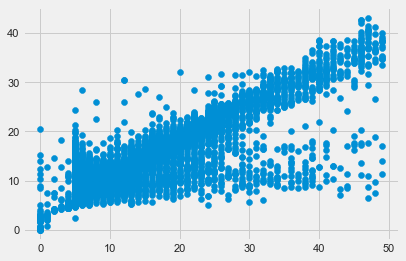

In [171]:
import matplotlib.pyplot as plt
plt.scatter(y, rf_best_load.predict(X))